In [1]:
from utils import *
import matplotlib.pyplot as plt

t_pre = 0.5#0.2
t_post = 0.50#0.300
bin_width = 0.005
# Créer les bins de temps"
psth_bins = np.arange(-t_pre, t_post, bin_width)

In [2]:
playback_sessions = ['ALTAI_20240724_SESSION_01', 'ALTAI_20240724_SESSION_02', 'ALTAI_20240725_SESSION_00', 'ALTAI_20240726_SESSION_01','ALTAI_20240809_SESSION_00', 'ALTAI_20240814_SESSION_00', 'ALTAI_20240822_SESSION_00']

In [6]:
tr_sustained, pb_sustained = [], []
tr_total_evoked, pb_total_evoked = [], []
tr_peak, pb_peak = [], []
for session in playback_sessions:
    path = '/Volumes/data2/eTheremin/ALTAI/'+ session + '/'

    tr_psth = np.load(path+f'psth_tracking_{bin_width}.npy')
    pb_psth = np.load(path+f'psth_playback_{bin_width}.npy')

    tr_sustained.append([get_sustained_activity(psth, t_pre, t_post, bin_width) for psth in tr_psth])
    pb_sustained.append([get_sustained_activity(psth, t_pre, t_post, bin_width) for psth in pb_psth])

    tr_total_evoked.append(get_total_evoked_response(tr_psth, t_pre, t_post, bin_width, None, 0, 140))
    pb_total_evoked.append(get_total_evoked_response(pb_psth, t_pre, t_post, bin_width, None, 0, 140))

    #tr_peak.append([tr_total_evoked[i] - tr_sustained[i] for i in range(len(tr_sustained))])
    #pb_peak.append([pb_total_evoked[i] - pb_sustained[i] for i in range(len(pb_sustained))])

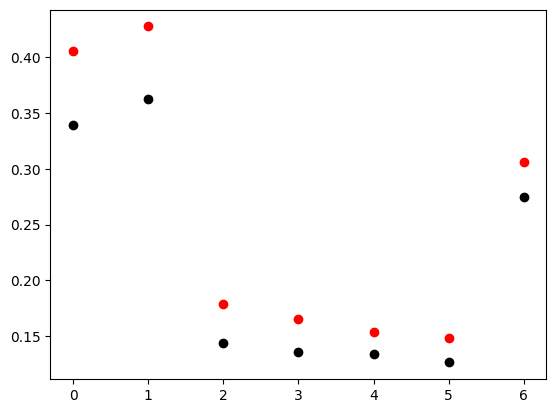

In [16]:
for i, elt in enumerate(tr_sustained):
    plt.scatter(i, np.nanmean(elt, axis=0), c = 'red')
    plt.scatter(i, np.nanmean(pb_sustained[i], axis=0), c = 'black')

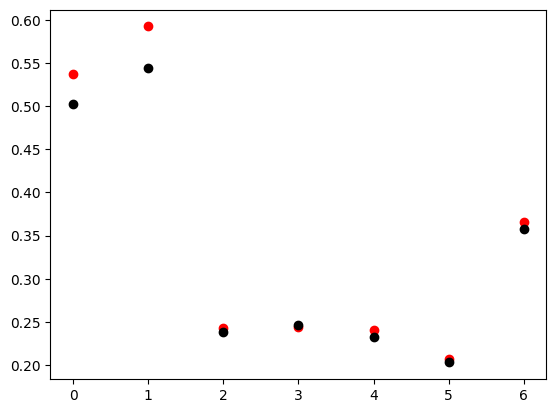

In [15]:
for i, elt in enumerate(tr_total_evoked):
    plt.scatter(i, np.nanmean(elt, axis=0), c = 'red')
    plt.scatter(i, np.nanmean(pb_total_evoked[i], axis=0), c = 'black')